In [1]:
from __future__ import division
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
import math
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
df = pd.read_csv('formatted_data_updated.csv')

df = df.replace('?', np.nan)
#print df
newdf = df.drop('UserID', axis = 1)
newdf

,Cajun Oven Baked Pork Chops,Chocolatey Overnight Oats with Strawberries,Baked Alaska,Decadent Black Forest Cake,Chocolate Chip Peanut Butter Banana Cookies,Coconut Cream Pie Vegan Milkshake,Protein Packed Carrot Muffins,Square Deviled Eggs,Baked Honey Sriracha Chicken Wings,Cheese Tortellini With Shrimp In Tomato Cream Sauce,...,Easy Pork Chops on Stuffing,Baked Pears with Oatmeal Crumble,Loaded Baked Potato Soup with Crispy-Fried Potato Skins,Mexican Casserole,Alouette Chicken Paprika,Homemade Animal Crackers,4 Ingredient Raw Peanut Butter Chocolate Cups,Cherry Blueberry Muffins,Drunken Noodles (Pad Kee Mao),Baked Tofu Cheesecake
0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
training_set = newdf[0:31]

test_set = newdf[31:37]


Adding all of the ratings corresponding to each recipe in a list of lists to make computation easier.

In [4]:
def makeArrays(dataframe): 
    recipeRatings = []
    #print recipeRatings
    for col in dataframe:
        lists = []
        for val in dataframe[col]:
            lists.append(val) 
        recipeRatings.append(lists)
    #print recipeRatings
    return recipeRatings

def averages(array):
    i = 0
    for ratings in array:
        sums = 0
        count = 1
        for rating in ratings:

            if(not math.isnan(rating)):
                sums  = sums + rating
                count = count +1
            average = float(sums/count)
            #print average
            array[i] = [average if math.isnan(x) else float(x) for x in array[i]]
        i = i+1

    #returns a numpy array
    return np.array(array)

In [5]:
#compute the averages of the row
def averages(row):
    #instantiate our variables
    avg = float(0)
    counter = float(1)

    #iterate over the cols in the row
    for col in row:
        if not np.isnan(float(col)):
            avg += float(col)
            counter += 1
    #compute the average
    return (avg/counter)


In [6]:
#initlize list of lists for spectral
training_data = []

for index, row in newdf.iterrows():
    #preprocessing for every row
    avg = averages(row)
    #initlize rows
    rows = []
    #for each col in row
    for col in row:
        #cast to float for nan behavior
        col = float(col)
        #if missing data
        if np.isnan(col):
            rows.append(avg)
        #not missing data
        else:
            rows.append(col)

    training_data.append(rows)

#cast to np array for fun times
training_data = np.array(training_data)


# K-means

#run PCA to reduce the data dimensionality so that it is easier to visualize
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(training_data)

In [7]:
#training_data = averages(makeArrays(training_set.T))
#print training_set.shape
kmeans = KMeans(n_clusters=4, random_state=0).fit(training_data)

set([0, 1, 2, 3])


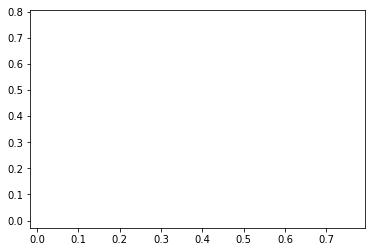

In [8]:
labels_kmeans = kmeans.labels_
set_lk = set(labels_kmeans)
print set_lk
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.show()

test_data = averages(makeArrays(test_set.T))
kmeans.predict(test_data)
kmeans.score(test_data)


# Spectral clustering

In [9]:
spectral = SpectralClustering()
spectral.fit(training_data)
print "lables from clustering"
print spectral.labels_

lables from clustering
[1 4 1 7 1 4 2 1 2 0 3 1 7 1 1 0 3 5 1 1 7 4 1 3 1 1 1 0 1 5 3 4 6 1 1 2 1
 1]


# Hierarchial/Agglomerative Clustering

In [10]:
# Define the structure A of the data. Here a 10 nearest neighbors
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(training_data, n_neighbors=10, include_self=False)

In [11]:
ward = AgglomerativeClustering(n_clusters=8, connectivity=connectivity,
                               linkage='ward').fit(training_data)

In [12]:
label = ward.labels_
print label

[2 3 1 1 3 3 7 3 7 5 0 2 1 3 0 5 0 0 1 3 1 3 4 0 0 3 5 5 6 0 0 3 3 1 1 7 1
 0]


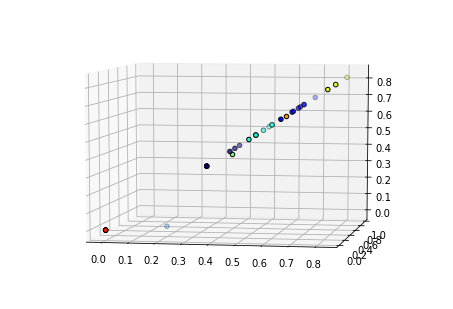

In [13]:
# Plot result
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(training_data[label == l, 0], training_data[label == l, 1], training_data[label == l, 2],
               color=plt.cm.jet(float(l) / np.max(label + 1)),
               s=20, edgecolor='k')

plt.show()

In [14]:
#testing
labels_dict = {}
ind = 0

for i in range(0, len(set_lk)):
    labels_dict[i] = []
#print len(set_lk)
#print labels_dict
for i in labels_kmeans:
    #if i not in labels_dict.values:
    #print i
    labels_dict[i].append(ind)
    ind = ind + 1
   
print labels_dict
    

{0: [1, 2, 3, 4, 5, 7, 13, 18, 19, 21, 28, 31, 32, 33, 34], 1: [0, 6, 8, 11, 35], 2: [9, 12, 15, 20, 26, 27, 36], 3: [10, 14, 16, 17, 22, 23, 24, 25, 29, 30, 37]}


In [15]:
colNames =  list(newdf.columns.values)
#print colNames
def findEle(index):
    #get all the colums corresponding to the particular row
    #colVals = df.loc[[index]]
    toRet = []
    likes = []
    dislikes = []
    for col in colNames:
        if not np.isnan(float(newdf.loc[[index]][col])):
            #print np.array(newdf.loc[[index]][col].astype(list))[1]
            for i in np.array(newdf.loc[[index]][col].astype(list)):
                #print type(i)
                if i == "1":
                    likes.append(col)
                else:
                    dislikes.append(col)
            
            #toRet.append(col)
    #print "likes: ", likes
    #print "dislikes: ", dislikes
    return (likes, dislikes)
    

TF-IDF

In [16]:
#compute tf-idf for the given array
#in Scikit-Learn
def tfIDF(array):
    sklearn_tfidf = TfidfVectorizer()#(stop_words = 'english')
    vec_representation = sklearn_tfidf.fit_transform(array)
    print vec_representation
    return vec_representation

Cosine similarity

In [17]:
#compute cosine similarity value for the given 
def cosine_sim(tf_idf_matrix):
    cosine_similarity()
    

In [21]:
#users = []
for key in labels_dict:
    for vals in labels_dict[key]:
        likes, dislikes  = findEle(vals)
        #print "key is ", key
        for like in likes:
            if not len(likes) == 0:
                tfIDF(likes)
                #print likes
        #print likes
        
        
        #print likes
        #print dislikes

  (0, 6)	0.707106781187
  (0, 17)	0.707106781187
  (1, 10)	0.4472135955
  (1, 3)	0.4472135955
  (1, 23)	0.4472135955
  (1, 21)	0.4472135955
  (1, 11)	0.4472135955
  (2, 19)	0.353553390593
  (2, 4)	0.353553390593
  (2, 24)	0.353553390593
  (2, 20)	0.353553390593
  (2, 25)	0.353553390593
  (2, 26)	0.353553390593
  (2, 13)	0.353553390593
  (2, 12)	0.353553390593
  (3, 15)	0.5
  (3, 8)	0.5
  (3, 1)	0.5
  (3, 22)	0.5
  (4, 2)	0.57735026919
  (4, 7)	0.57735026919
  (4, 18)	0.57735026919
  (5, 9)	0.4472135955
  (5, 14)	0.4472135955
  (5, 5)	0.4472135955
  (5, 16)	0.4472135955
  (5, 0)	0.4472135955
[' Chinese Potstickers', ' Crunchy Brussels Sprouts Side Dish', ' Roasted Cabbage Wedge Salad with Yogurt Gorgonzola Dressing', ' OREO Cookie Balls  Snowman', ' Bittersweet chocolate pudding', ' Crispy Italian Cauliflower Poppers Appetizer']
  (0, 6)	0.707106781187
  (0, 17)	0.707106781187
  (1, 10)	0.4472135955
  (1, 3)	0.4472135955
  (1, 23)	0.4472135955
  (1, 21)	0.4472135955
  (1, 11)	0.44721359

  (0, 4)	0.460157892127
  (0, 18)	0.460157892127
  (0, 39)	0.460157892127
  (0, 10)	0.391176248323
  (0, 45)	0.460157892127
  (1, 12)	0.301511344578
  (1, 2)	0.603022689156
  (1, 28)	0.301511344578
  (1, 36)	0.301511344578
  (1, 46)	0.301511344578
  (1, 42)	0.301511344578
  (1, 17)	0.301511344578
  (1, 11)	0.301511344578
  (2, 24)	0.408248290464
  (2, 22)	0.408248290464
  (2, 27)	0.408248290464
  (2, 29)	0.408248290464
  (2, 1)	0.408248290464
  (2, 16)	0.408248290464
  (3, 19)	0.57735026919
  (3, 31)	0.57735026919
  (3, 37)	0.57735026919
  (4, 9)	0.267261241912
  (4, 15)	0.267261241912
  (4, 35)	0.534522483825
  :	:
  (4, 43)	0.267261241912
  (4, 40)	0.267261241912
  (4, 7)	0.267261241912
  (4, 48)	0.267261241912
  (4, 21)	0.267261241912
  (4, 47)	0.267261241912
  (4, 26)	0.267261241912
  (5, 20)	0.408248290464
  (5, 41)	0.408248290464
  (5, 23)	0.408248290464
  (5, 49)	0.408248290464
  (5, 8)	0.408248290464
  (5, 34)	0.408248290464
  (6, 32)	0.57735026919
  (6, 33)	0.57735026919
  (6,

  (9, 19)	0.468645882299
[' Grape Tomatoes', ' Easy Chicken Tikka Masala', ' Sliced Baguette with Anchovy Chive Butter and Radishes', ' Chocolate Peanut Butter No-Bake Dessert', ' Classic Matzo Ball Soup', ' Grilled Baked Brie with Shallots', ' Cranberries & Balsamic', ' Pork Chops with Garlic Cream', ' Easy Baked Parmesan Chicken', ' Mushroom Goat Cheese Baked Eggs']
  (0, 22)	0.707106781187
  (0, 36)	0.707106781187
  (1, 18)	0.457985163789
  (1, 10)	0.457985163789
  (1, 35)	0.538748169138
  (1, 24)	0.538748169138
  (2, 33)	0.37073189912
  (2, 2)	0.37073189912
  (2, 37)	0.275724245225
  (2, 0)	0.37073189912
  (2, 11)	0.37073189912
  (2, 8)	0.31515598431
  (2, 1)	0.37073189912
  (2, 31)	0.37073189912
  (3, 8)	0.355358581631
  (3, 12)	0.418023989374
  (3, 29)	0.418023989374
  (3, 27)	0.418023989374
  (3, 3)	0.418023989374
  (3, 17)	0.418023989374
  (4, 14)	0.5
  (4, 25)	0.5
  (4, 5)	0.5
  (4, 34)	0.5
  (5, 37)	0.367021413004
  (5, 23)	0.493487779245
  (5, 4)	0.367021413004
  (5, 7)	0.49

  (0, 8)	0.398351616537
  (0, 5)	0.398351616537
  (0, 4)	0.321387575997
  (0, 19)	0.321387575997
  (0, 10)	0.398351616537
  (0, 6)	0.398351616537
  (0, 13)	0.398351616537
  (1, 14)	0.57735026919
  (1, 11)	0.57735026919
  (1, 2)	0.57735026919
  (2, 1)	0.57735026919
  (2, 3)	0.57735026919
  (2, 17)	0.57735026919
  (3, 4)	0.531772253728
  (3, 19)	0.531772253728
  (3, 15)	0.659118001825
  (4, 9)	0.666666666667
  (4, 0)	0.333333333333
  (4, 18)	0.333333333333
  (4, 12)	0.333333333333
  (4, 16)	0.333333333333
  (4, 7)	0.333333333333
[' Classic Carrot Cake With Cream Cheese Frosting', ' Hot Cross Buns', ' Banana Buttermilk Pancakes', ' Cake with lemon', ' Cous Cous and Stir-Fried Mango Chicken']
  (0, 8)	0.398351616537
  (0, 5)	0.398351616537
  (0, 4)	0.321387575997
  (0, 19)	0.321387575997
  (0, 10)	0.398351616537
  (0, 6)	0.398351616537
  (0, 13)	0.398351616537
  (1, 14)	0.57735026919
  (1, 11)	0.57735026919
  (1, 2)	0.57735026919
  (2, 1)	0.57735026919
  (2, 3)	0.57735026919
  (2, 17)	0.57

  (0, 4)	0.353553390593
  (0, 33)	0.353553390593
  (0, 37)	0.353553390593
  (0, 28)	0.353553390593
  (0, 16)	0.353553390593
  (0, 32)	0.353553390593
  (0, 8)	0.353553390593
  (0, 27)	0.353553390593
  (1, 34)	0.539381580357
  (1, 6)	0.356654640113
  (1, 25)	0.539381580357
  (1, 9)	0.539381580357
  (2, 35)	0.57735026919
  (2, 15)	0.57735026919
  (2, 23)	0.57735026919
  (3, 22)	0.761904967499
  (3, 3)	0.647688829995
  (4, 14)	0.57735026919
  (4, 10)	0.57735026919
  (4, 13)	0.57735026919
  (5, 6)	0.313903467519
  (5, 29)	0.474727451565
  (5, 7)	0.474727451565
  (5, 31)	0.474727451565
  (5, 30)	0.474727451565
  (6, 6)	0.356654640113
  (6, 17)	0.539381580357
  (6, 24)	0.539381580357
  (6, 21)	0.539381580357
  (7, 2)	0.4472135955
  (7, 20)	0.4472135955
  (7, 0)	0.4472135955
  (7, 19)	0.4472135955
  (7, 26)	0.4472135955
  (8, 6)	0.371977396634
  (8, 3)	0.478222918542
  (8, 36)	0.562554733593
  (8, 11)	0.562554733593
  (9, 1)	0.5
  (9, 12)	0.5
  (9, 18)	0.5
  (9, 5)	0.5
[' Cheese Tortellini Wit

  (0, 26)	0.526067555666
  (0, 10)	0.526067555666
  (0, 29)	0.526067555666
  (0, 16)	0.412017937263
  (1, 31)	0.412224498491
  (1, 20)	0.32285565937
  (1, 23)	0.359947078872
  (1, 18)	0.412224498491
  (1, 13)	0.412224498491
  (1, 54)	0.294085319249
  (1, 4)	0.412224498491
  (2, 8)	0.5
  (2, 28)	0.5
  (2, 11)	0.5
  (2, 48)	0.5
  (3, 16)	0.436001062116
  (3, 20)	0.436001062116
  (3, 2)	0.556689387211
  (3, 14)	0.556689387211
  (4, 33)	0.465084443868
  (4, 30)	0.465084443868
  (4, 42)	0.532631636379
  (4, 47)	0.532631636379
  (5, 54)	0.34518692433
  (5, 37)	0.483854505661
  :	:
  (10, 3)	0.5
  (11, 54)	0.380847113657
  (11, 58)	0.533840012244
  (11, 39)	0.533840012244
  (11, 43)	0.533840012244
  (12, 0)	0.525361049603
  (12, 21)	0.601662599619
  (12, 19)	0.601662599619
  (13, 33)	0.410488166346
  (13, 30)	0.410488166346
  (13, 38)	0.4701059918
  (13, 55)	0.4701059918
  (13, 15)	0.4701059918
  (14, 41)	0.4472135955
  (14, 12)	0.4472135955
  (14, 36)	0.4472135955
  (14, 17)	0.4472135955
  (

  (0, 1)	0.518938071798
  (0, 31)	0.518938071798
  (0, 25)	0.518938071798
  (0, 7)	0.43830335718
  (1, 33)	0.57735026919
  (1, 29)	0.57735026919
  (1, 23)	0.57735026919
  (2, 15)	0.57735026919
  (2, 10)	0.57735026919
  (2, 14)	0.57735026919
  (3, 7)	0.38903906952
  (3, 20)	0.460610627968
  (3, 36)	0.460610627968
  (3, 8)	0.460610627968
  (3, 21)	0.460610627968
  (4, 9)	0.366944629584
  (4, 4)	0.366944629584
  (4, 0)	0.309927276079
  (4, 6)	0.366944629584
  (4, 35)	0.309927276079
  (4, 18)	0.366944629584
  (4, 22)	0.366944629584
  (4, 28)	0.366944629584
  (5, 35)	0.309927276079
  (5, 30)	0.366944629584
  (5, 27)	0.366944629584
  (5, 13)	0.366944629584
  (5, 5)	0.366944629584
  (5, 19)	0.309927276079
  (5, 11)	0.366944629584
  (5, 16)	0.366944629584
  (6, 19)	0.512748347554
  (6, 32)	0.607078714864
  (6, 2)	0.607078714864
  (7, 34)	0.707106781187
  (7, 24)	0.707106781187
  (8, 0)	0.38903906952
  (8, 12)	0.460610627968
  (8, 17)	0.460610627968
  (8, 26)	0.460610627968
  (8, 3)	0.460610627

  (0, 4)	0.495523790797
  (0, 10)	0.614188966343
  (0, 5)	0.614188966343
  (1, 0)	0.5
  (1, 9)	0.5
  (1, 17)	0.5
  (1, 14)	0.5
  (2, 4)	0.422242140986
  (2, 15)	0.52335825027
  (2, 12)	0.52335825027
  (2, 3)	0.52335825027
  (3, 13)	0.377964473009
  (3, 19)	0.377964473009
  (3, 16)	0.377964473009
  (3, 1)	0.377964473009
  (3, 11)	0.377964473009
  (3, 6)	0.377964473009
  (3, 7)	0.377964473009
  (4, 18)	0.57735026919
  (4, 8)	0.57735026919
  (4, 2)	0.57735026919
[' Chocolate Fudge Cookies', ' Allergy-Free Thin Mints', ' Molten Chocolate Liquor Cakes', ' Mangoes with Rum and Ice Cream Dessert', ' Turkey Enchilada Bake']
  (0, 4)	0.495523790797
  (0, 10)	0.614188966343
  (0, 5)	0.614188966343
  (1, 0)	0.5
  (1, 9)	0.5
  (1, 17)	0.5
  (1, 14)	0.5
  (2, 4)	0.422242140986
  (2, 15)	0.52335825027
  (2, 12)	0.52335825027
  (2, 3)	0.52335825027
  (3, 13)	0.377964473009
  (3, 19)	0.377964473009
  (3, 16)	0.377964473009
  (3, 1)	0.377964473009
  (3, 11)	0.377964473009
  (3, 6)	0.377964473009
  (3, 

  (0, 42)	0.473786061443
  (0, 47)	0.375877394374
  (0, 124)	0.430460786072
  (0, 173)	0.473786061443
  (0, 100)	0.473786061443
  (1, 61)	0.499410987908
  (1, 76)	0.499410987908
  (1, 0)	0.272467457938
  (1, 78)	0.499410987908
  (1, 150)	0.421340099959
  (2, 150)	0.46968444904
  (2, 149)	0.556713151022
  (2, 32)	0.399421398135
  (2, 58)	0.556713151022
  (3, 4)	0.524907146582
  (3, 157)	0.524907146582
  (3, 138)	0.524907146582
  (3, 25)	0.41643422338
  (4, 170)	0.707106781187
  (4, 55)	0.707106781187
  (5, 68)	0.594914363794
  (5, 63)	0.540512534085
  (5, 145)	0.594914363794
  (6, 0)	0.415167044023
  (6, 67)	0.380483939571
  :	:
  (54, 33)	0.540455916483
  (54, 136)	0.540455916483
  (55, 178)	0.372403149288
  (55, 45)	0.475475593899
  (55, 40)	0.563577347844
  (55, 137)	0.563577347844
  (56, 129)	1.0
  (57, 0)	0.359926765004
  (57, 152)	0.659716880121
  (57, 81)	0.659716880121
  (58, 0)	0.266558664357
  (58, 25)	0.387614651684
  (58, 178)	0.322846492989
  (58, 177)	0.443902480315
  (58,

  (0, 45)	0.423369404877
  (0, 48)	0.423369404877
  (0, 30)	0.423369404877
  (0, 0)	0.322167247046
  (0, 29)	0.423369404877
  (0, 11)	0.423369404877
  (1, 24)	0.382505265851
  (1, 105)	0.502661360678
  (1, 121)	0.382505265851
  (1, 46)	0.449491441694
  (1, 20)	0.502661360678
  (2, 76)	0.5
  (2, 100)	0.5
  (2, 13)	0.5
  (2, 98)	0.5
  (3, 63)	0.707106781187
  (3, 83)	0.707106781187
  (4, 1)	0.597653249425
  (4, 61)	0.534435390767
  (4, 10)	0.597653249425
  (5, 121)	0.334400586846
  (5, 61)	0.392962438178
  (5, 70)	0.439445594615
  (5, 53)	0.439445594615
  (5, 12)	0.439445594615
  :	:
  (26, 39)	0.597653249425
  (26, 33)	0.597653249425
  (27, 121)	0.355609809063
  (27, 43)	0.467317254041
  (27, 110)	0.467317254041
  (27, 54)	0.467317254041
  (27, 97)	0.467317254041
  (28, 65)	0.534435390767
  (28, 72)	0.597653249425
  (28, 23)	0.597653249425
  (29, 41)	0.554651524184
  (29, 32)	0.554651524184
  (29, 7)	0.62026073021
  (30, 0)	0.355609809063
  (30, 14)	0.467317254041
  (30, 102)	0.46731725

  (0, 9)	0.57735026919
  (0, 20)	0.57735026919
  (0, 24)	0.57735026919
  (1, 35)	0.517256628702
  (1, 33)	0.517256628702
  (1, 19)	0.517256628702
  (1, 13)	0.444226001257
  (2, 11)	0.57735026919
  (2, 27)	0.57735026919
  (2, 41)	0.57735026919
  (3, 17)	0.5
  (3, 34)	0.5
  (3, 44)	0.5
  (3, 36)	0.5
  (4, 15)	0.5
  (4, 10)	0.5
  (4, 43)	0.5
  (4, 22)	0.5
  (5, 4)	0.5
  (5, 2)	0.5
  (5, 7)	0.5
  (5, 40)	0.5
  (6, 25)	0.536432921299
  (6, 38)	0.536432921299
  (6, 6)	0.460694824094
  (6, 37)	0.460694824094
  (7, 23)	0.408248290464
  (7, 21)	0.408248290464
  (7, 28)	0.408248290464
  (7, 30)	0.408248290464
  (7, 0)	0.408248290464
  (7, 18)	0.408248290464
  (8, 13)	0.358537337117
  (8, 29)	0.417480772705
  (8, 12)	0.417480772705
  (8, 26)	0.417480772705
  (8, 1)	0.417480772705
  (8, 8)	0.417480772705
  (9, 14)	0.57735026919
  (9, 32)	0.57735026919
  (9, 3)	0.57735026919
  (10, 6)	0.460694824094
  (10, 37)	0.460694824094
  (10, 5)	0.536432921299
  (10, 16)	0.536432921299
  (11, 42)	0.5773502691

  (0, 5)	0.463693222732
  (0, 1)	0.37410477245
  (0, 3)	0.463693222732
  (0, 19)	0.463693222732
  (0, 0)	0.463693222732
  (1, 1)	0.422242140986
  (1, 18)	0.52335825027
  (1, 2)	0.52335825027
  (1, 15)	0.52335825027
  (2, 9)	0.5
  (2, 10)	0.5
  (2, 14)	0.5
  (2, 13)	0.5
  (3, 6)	0.57735026919
  (3, 12)	0.57735026919
  (3, 16)	0.57735026919
  (4, 4)	0.4472135955
  (4, 11)	0.4472135955
  (4, 17)	0.4472135955
  (4, 7)	0.4472135955
  (4, 8)	0.4472135955
[' Chicken Avocado Burger (Whole 30', ' Turkey Avocado BLT Salad', " Grandma Inez's Pineapple Pie", ' Chocolate nut spread', ' Cajun Louisiana Style Crawfish Etouffee']
  (0, 5)	0.463693222732
  (0, 1)	0.37410477245
  (0, 3)	0.463693222732
  (0, 19)	0.463693222732
  (0, 0)	0.463693222732
  (1, 1)	0.422242140986
  (1, 18)	0.52335825027
  (1, 2)	0.52335825027
  (1, 15)	0.52335825027
  (2, 9)	0.5
  (2, 10)	0.5
  (2, 14)	0.5
  (2, 13)	0.5
  (3, 6)	0.57735026919
  (3, 12)	0.57735026919
  (3, 16)	0.57735026919
  (4, 4)	0.4472135955
  (4, 11)	0.447

  (0, 41)	0.5
  (0, 40)	0.5
  (0, 25)	0.5
  (0, 16)	0.5
  (1, 6)	0.57735026919
  (1, 53)	0.57735026919
  (1, 24)	0.57735026919
  (2, 35)	0.57735026919
  (2, 37)	0.57735026919
  (2, 4)	0.57735026919
  (3, 0)	0.57735026919
  (3, 7)	0.57735026919
  (3, 44)	0.57735026919
  (4, 17)	0.408248290464
  (4, 21)	0.408248290464
  (4, 29)	0.408248290464
  (4, 42)	0.408248290464
  (4, 30)	0.408248290464
  (4, 50)	0.408248290464
  (5, 18)	0.365755669769
  (5, 45)	0.365755669769
  (5, 54)	0.314115217868
  (5, 34)	0.365755669769
  (5, 2)	0.314115217868
  (5, 1)	0.365755669769
  :	:
  (7, 33)	0.57735026919
  (7, 13)	0.57735026919
  (7, 9)	0.57735026919
  (8, 3)	0.4472135955
  (8, 11)	0.4472135955
  (8, 10)	0.4472135955
  (8, 15)	0.4472135955
  (8, 5)	0.4472135955
  (9, 54)	0.290537964333
  (9, 46)	0.338302322502
  (9, 14)	0.338302322502
  (9, 27)	0.338302322502
  (9, 38)	0.338302322502
  (9, 49)	0.338302322502
  (9, 12)	0.338302322502
  (9, 36)	0.338302322502
  (9, 43)	0.338302322502
  (10, 32)	0.447213

  (6, 6)	0.57735026919
[' Grilled Peach Melba with Vanilla Bean Frozen Yogurt', ' PALEO', ' Gluten Free Onion Rings', ' Albondigas Soup', ' Slow Cooker Chicken Taco Soup', ' Peach Melba', ' Cajun Corn Dip']
  (0, 10)	0.368152851761
  (0, 14)	0.30559848367
  (0, 11)	0.30559848367
  (0, 20)	0.368152851761
  (0, 19)	0.368152851761
  (0, 1)	0.368152851761
  (0, 8)	0.368152851761
  (0, 21)	0.368152851761
  (1, 13)	1.0
  (2, 9)	0.5
  (2, 7)	0.5
  (2, 12)	0.5
  (2, 15)	0.5
  (3, 0)	0.769448757395
  (3, 17)	0.638708548356
  (4, 17)	0.383337175395
  (4, 16)	0.461804236111
  (4, 4)	0.461804236111
  (4, 3)	0.461804236111
  (4, 18)	0.461804236111
  (5, 14)	0.707106781187
  (5, 11)	0.707106781187
  (6, 2)	0.57735026919
  (6, 5)	0.57735026919
  (6, 6)	0.57735026919
[' Grilled Peach Melba with Vanilla Bean Frozen Yogurt', ' PALEO', ' Gluten Free Onion Rings', ' Albondigas Soup', ' Slow Cooker Chicken Taco Soup', ' Peach Melba', ' Cajun Corn Dip']
  (0, 10)	0.368152851761
  (0, 14)	0.30559848367
  (0,

  (0, 23)	0.534260556745
  (0, 8)	0.37907383518
  (0, 10)	0.534260556745
  (0, 11)	0.534260556745
  (1, 7)	0.707106781187
  (1, 20)	0.707106781187
  (2, 6)	0.5
  (2, 14)	0.5
  (2, 18)	0.5
  (2, 5)	0.5
  (3, 8)	0.37907383518
  (3, 25)	0.534260556745
  (3, 24)	0.534260556745
  (3, 15)	0.534260556745
  (4, 12)	0.360631673664
  (4, 3)	0.360631673664
  (4, 0)	0.360631673664
  (4, 4)	0.360631673664
  (4, 26)	0.360631673664
  (4, 13)	0.360631673664
  (4, 16)	0.299355259936
  (4, 21)	0.360631673664
  (5, 8)	0.448438343039
  (5, 1)	0.632021776718
  (5, 17)	0.632021776718
  (6, 16)	0.383337175395
  (6, 22)	0.461804236111
  (6, 2)	0.461804236111
  (6, 19)	0.461804236111
  (6, 9)	0.461804236111
[' Ultimate Chocolate Chunk Cookies', ' Chinese Potstickers', ' Cherry Jello Poke Cake', ' White Chocolate Vanilla Latte', ' Corned Beef And Cabbage With Irish Mustard Sauce', ' Chocolate Banoffee Pie', ' Sweet Mustard BBQ Pork Chops']
  (0, 23)	0.534260556745
  (0, 8)	0.37907383518
  (0, 10)	0.534260556745

  (0, 14)	0.388614292631
  (0, 9)	0.388614292631
  (0, 3)	0.388614292631
  (0, 7)	0.388614292631
  (0, 16)	0.306387971983
  (0, 1)	0.388614292631
  (0, 12)	0.388614292631
  (1, 10)	0.5
  (1, 8)	0.5
  (1, 13)	0.5
  (1, 15)	0.5
  (2, 16)	0.366739011297
  (2, 11)	0.465161933522
  (2, 2)	0.465161933522
  (2, 0)	0.465161933522
  (2, 6)	0.465161933522
  (3, 4)	0.707106781187
  (3, 5)	0.707106781187
[' Pan-Fried Basa Fillets With Asian Marinade', ' Gluten Free Onion Rings', ' Lemon Bars with Almond Crust', ' Brownie Coffins']
  (0, 14)	0.388614292631
  (0, 9)	0.388614292631
  (0, 3)	0.388614292631
  (0, 7)	0.388614292631
  (0, 16)	0.306387971983
  (0, 1)	0.388614292631
  (0, 12)	0.388614292631
  (1, 10)	0.5
  (1, 8)	0.5
  (1, 13)	0.5
  (1, 15)	0.5
  (2, 16)	0.366739011297
  (2, 11)	0.465161933522
  (2, 2)	0.465161933522
  (2, 0)	0.465161933522
  (2, 6)	0.465161933522
  (3, 4)	0.707106781187
  (3, 5)	0.707106781187
[' Pan-Fried Basa Fillets With Asian Marinade', ' Gluten Free Onion Rings', ' L

  (0, 8)	0.377964473009
  (0, 0)	0.377964473009
  (0, 6)	0.377964473009
  (0, 12)	0.377964473009
  (0, 2)	0.377964473009
  (0, 3)	0.377964473009
  (0, 4)	0.377964473009
  (1, 10)	0.57735026919
  (1, 11)	0.57735026919
  (1, 5)	0.57735026919
  (2, 1)	0.57735026919
  (2, 9)	0.57735026919
  (2, 7)	0.57735026919
[' Rice and Peas with Coconut Curry Mackerel', ' Toasted Tropical Marshmallows', ' Bruschetta Stuffed Potatoes']
  (0, 8)	0.377964473009
  (0, 0)	0.377964473009
  (0, 6)	0.377964473009
  (0, 12)	0.377964473009
  (0, 2)	0.377964473009
  (0, 3)	0.377964473009
  (0, 4)	0.377964473009
  (1, 10)	0.57735026919
  (1, 11)	0.57735026919
  (1, 5)	0.57735026919
  (2, 1)	0.57735026919
  (2, 9)	0.57735026919
  (2, 7)	0.57735026919
[' Rice and Peas with Coconut Curry Mackerel', ' Toasted Tropical Marshmallows', ' Bruschetta Stuffed Potatoes']
  (0, 8)	0.377964473009
  (0, 0)	0.377964473009
  (0, 6)	0.377964473009
  (0, 12)	0.377964473009
  (0, 2)	0.377964473009
  (0, 3)	0.377964473009
  (0, 4)	0.

  (0, 38)	0.477179432196
  (0, 96)	0.477179432196
  (0, 92)	0.477179432196
  (0, 139)	0.298662280776
  (0, 128)	0.477179432196
  (1, 120)	0.450830828298
  (1, 42)	0.450830828298
  (1, 12)	0.544749083759
  (1, 127)	0.544749083759
  (2, 139)	0.221165964509
  (2, 65)	0.353361827584
  (2, 58)	0.317724825108
  (2, 141)	0.353361827584
  (2, 33)	0.317724825108
  (2, 140)	0.353361827584
  (2, 44)	0.353361827584
  (2, 3)	0.353361827584
  (2, 54)	0.353361827584
  (3, 70)	0.57735026919
  (3, 134)	0.57735026919
  (3, 114)	0.57735026919
  (4, 61)	0.430661006352
  (4, 62)	0.430661006352
  (4, 37)	0.430661006352
  (4, 1)	0.26954681975
  :	:
  (33, 104)	0.272649892953
  (34, 125)	0.347100515948
  (34, 123)	0.419409401857
  (34, 132)	0.419409401857
  (34, 9)	0.419409401857
  (34, 88)	0.419409401857
  (34, 115)	0.419409401857
  (35, 82)	0.569426046412
  (35, 31)	0.524110558772
  (35, 91)	0.633294639051
  (36, 57)	0.545479951062
  (36, 39)	0.592643072595
  (36, 14)	0.592643072595
  (37, 1)	0.298662280776

  (0, 24)	0.390638902031
  (0, 11)	0.390638902031
  (0, 18)	0.390638902031
  (0, 9)	0.390638902031
  (0, 6)	0.390638902031
  (0, 43)	0.290529670293
  (0, 2)	0.390638902031
  (1, 43)	0.2811345677
  (1, 5)	0.378006482913
  (1, 4)	0.378006482913
  (1, 1)	0.32134004514
  (1, 41)	0.378006482913
  (1, 7)	0.32134004514
  (1, 16)	0.378006482913
  (1, 34)	0.378006482913
  (2, 1)	0.355358581631
  (2, 38)	0.418023989374
  (2, 13)	0.418023989374
  (2, 26)	0.418023989374
  (2, 42)	0.418023989374
  (2, 12)	0.418023989374
  (3, 20)	0.4472135955
  (3, 21)	0.4472135955
  (3, 23)	0.4472135955
  (3, 31)	0.4472135955
  (3, 27)	0.4472135955
  (4, 14)	0.5
  (4, 29)	0.5
  (4, 3)	0.5
  (4, 36)	0.5
  (5, 32)	0.5
  (5, 8)	0.5
  (5, 37)	0.5
  (5, 15)	0.5
  (6, 0)	0.518290903432
  (6, 22)	0.440594618963
  (6, 39)	0.518290903432
  (6, 30)	0.518290903432
  (7, 22)	0.515192189028
  (7, 25)	0.606043318734
  (7, 19)	0.606043318734
  (8, 10)	0.57735026919
  (8, 17)	0.57735026919
  (8, 33)	0.57735026919
  (9, 43)	0.3596

  (0, 0)	0.622766007833
  (0, 3)	0.473629601033
  (0, 2)	0.622766007833
  (1, 6)	0.707106781187
  (1, 5)	0.707106781187
  (2, 3)	0.473629601033
  (2, 1)	0.622766007833
  (2, 4)	0.622766007833
[' Almond Nut Butter', ' Whoopie Pies', ' Banana Nut Pancakes']
  (0, 0)	0.622766007833
  (0, 3)	0.473629601033
  (0, 2)	0.622766007833
  (1, 6)	0.707106781187
  (1, 5)	0.707106781187
  (2, 3)	0.473629601033
  (2, 1)	0.622766007833
  (2, 4)	0.622766007833
[' Almond Nut Butter', ' Whoopie Pies', ' Banana Nut Pancakes']
  (0, 2)	0.707106781187
  (0, 3)	0.707106781187
  (1, 7)	0.57735026919
  (1, 0)	0.57735026919
  (1, 1)	0.57735026919
  (2, 5)	0.4472135955
  (2, 4)	0.4472135955
  (2, 9)	0.4472135955
  (2, 6)	0.4472135955
  (2, 8)	0.4472135955
[' Chinese Potstickers', ' The Best Chili', ' Spinach Salad with Strawberry Vinaigrette']
  (0, 2)	0.707106781187
  (0, 3)	0.707106781187
  (1, 7)	0.57735026919
  (1, 0)	0.57735026919
  (1, 1)	0.57735026919
  (2, 5)	0.4472135955
  (2, 4)	0.4472135955
  (2, 9)	0